# Data Wrangling WeRateDogs

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
    <ul>
        <li><a href="#gather">Gather</a></li>
        <li><a href="#assess">Assess</a></li>
        <li><a href="#clean">Clean</a></li>
    </ul>
<li><a href="#storing">Storing</a></li>
<li><a href="#eda">Analyzing and Visualizing Data</a></li>
</ul>

<a id='intro'></a>
## Introduction

Real-world data rarely comes clean. Using Python and its libraries, we can gather data from a variety of sources and in a variety of formats, assess its quality and tidiness, then clean it. This is called data wrangling.

The dataset that we will be wrangling (and analyzing and visualizing) is the tweet archive of Twitter user [@dog_rates](https://twitter.com/dog_rates), also known as [WeRateDogs](https://en.wikipedia.org/wiki/WeRateDogs). WeRateDogs is a Twitter account that rates people's dogs with a humorous comment about the dog. These ratings almost always have a denominator of 10. The numerators, though? Almost always greater than 10. 11/10, 12/10, 13/10, etc. Why? Because "[they're good dogs Brent](https://knowyourmeme.com/memes/theyre-good-dogs-brent)". 

<a id='wrangling'></a>
## Data Wrangling


<a id='gather'></a>
### Gather

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
import requests
import tweepy
import json
import time

In [2]:
sns.set_theme()

#### WeRateDogs twitter archive

In [3]:
# Read the WeRateDogs twitter archive
archive = pd.read_csv("twitter-archive-enhanced.csv")

#### Tweet image predictions 

In [4]:
# Download the image_predictions.tsv file with the tweet image predictions
url = "https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv"

with open("image_predictions.tsv", "w") as f:
    r = requests.get(url)
    f.write(r.text)
    
# Read the image predictions file
predictions = pd.read_csv("image_predictions.tsv", sep="\t")

#### Twitter API

In [5]:
consumer_key = "YOUR CONSUMER KEY"
consumer_secret = "YOUR CONSUMER SECRET"
access_token = "YOUR ACCESS TOKEN"
access_secret = "YOUR ACCESS SECRET"

auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_secret)

api = tweepy.API(auth, wait_on_rate_limit=True, wait_on_rate_limit_notify=True)

In [6]:
id_errors = []
count = 0
start = time.time()
with open("tweet_json.txt", "w") as f:
    tweet_ids = list(archive.tweet_id)
    for tweet_id in tweet_ids:
        try:
            tweet = api.get_status(tweet_id, tweet_mode="extended")
        except tweepy.TweepError:
            id_errors.append(tweet_id)
        
        count += 1
        json.dump(tweet._json, f)
        f.write("\n")
        print(f"{count}/{len(tweet_ids)}", tweet_id, round(time.time() - start, 2))

1/2356 892420643555336193 0.31
2/2356 892177421306343426 0.55
3/2356 891815181378084864 0.83
4/2356 891689557279858688 1.1
5/2356 891327558926688256 1.34
6/2356 891087950875897856 1.61
7/2356 890971913173991426 1.89
8/2356 890729181411237888 2.14
9/2356 890609185150312448 2.4
10/2356 890240255349198849 2.64
11/2356 890006608113172480 2.9
12/2356 889880896479866881 3.15
13/2356 889665388333682689 3.66
14/2356 889638837579907072 3.95
15/2356 889531135344209921 4.21
16/2356 889278841981685760 4.49
17/2356 888917238123831296 4.76
18/2356 888804989199671297 5.03
19/2356 888554962724278272 5.32
20/2356 888202515573088257 5.55
21/2356 888078434458587136 5.82
22/2356 887705289381826560 6.09
23/2356 887517139158093824 6.35
24/2356 887473957103951883 6.61
25/2356 887343217045368832 6.86
26/2356 887101392804085760 7.15
27/2356 886983233522544640 7.39
28/2356 886736880519319552 7.63
29/2356 886680336477933568 7.87
30/2356 886366144734445568 8.11
31/2356 886267009285017600 8.38
32/2356 886258384151

247/2356 845677943972139009 69.35
248/2356 845459076796616705 69.59
249/2356 845397057150107648 69.85
250/2356 845306882940190720 70.14
251/2356 845098359547420673 70.48
252/2356 844979544864018432 70.76
253/2356 844973813909606400 71.01
254/2356 844704788403113984 71.28
255/2356 844580511645339650 71.55
256/2356 844223788422217728 71.88
257/2356 843981021012017153 72.17
258/2356 843856843873095681 72.45
259/2356 843604394117681152 72.73
260/2356 843235543001513987 73.02
261/2356 842892208864923648 73.29
262/2356 842846295480000512 73.59
263/2356 842765311967449089 73.84
264/2356 842535590457499648 74.12
265/2356 842163532590374912 74.38
266/2356 842115215311396866 74.73
267/2356 841833993020538882 75.04
268/2356 841680585030541313 75.31
269/2356 841439858740625411 75.56
270/2356 841320156043304961 75.82
271/2356 841314665196081154 76.09
272/2356 841077006473256960 76.38
273/2356 840761248237133825 76.7
274/2356 840728873075638272 76.96
275/2356 840698636975636481 77.23
276/2356 840696

485/2356 814638523311648768 135.8
486/2356 814578408554463233 136.06
487/2356 814530161257443328 136.34
488/2356 814153002265309185 136.57
489/2356 813944609378369540 136.84
490/2356 813910438903693312 137.06
491/2356 813812741911748608 137.34
492/2356 813800681631023104 137.59
493/2356 813217897535406080 137.89
494/2356 813202720496779264 138.18
495/2356 813187593374461952 138.48
496/2356 813172488309972993 138.73
497/2356 813157409116065792 138.99
498/2356 813142292504645637 139.32
499/2356 813130366689148928 139.58
500/2356 813127251579564032 139.82
501/2356 813112105746448384 140.07
502/2356 813096984823349248 140.3
503/2356 813081950185472002 140.6
504/2356 813066809284972545 140.85
505/2356 813051746834595840 141.15
506/2356 812781120811126785 141.47
507/2356 812747805718642688 141.72
508/2356 812709060537683968 142.02
509/2356 812503143955202048 142.32
510/2356 812466873996607488 142.62
511/2356 812372279581671427 142.87
512/2356 811985624773361665 143.14
513/2356 81174420245119

720/2356 783391753726550016 201.32
721/2356 783347506784731136 201.63
722/2356 783334639985389568 201.9
723/2356 783085703974514689 202.17
724/2356 782969140009107456 202.5
725/2356 782747134529531904 202.79
726/2356 782722598790725632 203.06
727/2356 782598640137187329 203.32
728/2356 782305867769217024 203.58
729/2356 782021823840026624 203.87
730/2356 781955203444699136 204.13
731/2356 781661882474196992 204.4
732/2356 781655249211752448 204.68
733/2356 781524693396357120 205.02
734/2356 781308096455073793 205.25
735/2356 781251288990355457 205.54
736/2356 781163403222056960 205.84
737/2356 780931614150983680 206.09
738/2356 780858289093574656 206.35
739/2356 780800785462489090 206.62
740/2356 780601303617732608 206.87
741/2356 780543529827336192 207.15
742/2356 780496263422808064 207.47
743/2356 780476555013349377 207.73
744/2356 780459368902959104 208.04
745/2356 780192070812196864 208.32
746/2356 780092040432480260 208.6
747/2356 780074436359819264 208.87
748/2356 779834332596887

Rate limit reached. Sleeping for: 650


901/2356 758740312047005698 907.5
902/2356 758474966123810816 907.79
903/2356 758467244762497024 908.07
904/2356 758405701903519748 908.38
905/2356 758355060040593408 908.63
906/2356 758099635764359168 908.93
907/2356 758041019896193024 909.22
908/2356 757741869644341248 909.51
909/2356 757729163776290825 909.78
910/2356 757725642876129280 910.05
911/2356 757611664640446465 910.36
912/2356 757597904299253760 910.67
913/2356 757596066325864448 910.93
914/2356 757400162377592832 911.21
915/2356 757393109802180609 911.52
916/2356 757354760399941633 911.82
917/2356 756998049151549440 912.13
918/2356 756939218950160384 912.44
919/2356 756651752796094464 912.74
920/2356 756526248105566208 913.03
921/2356 756303284449767430 913.29
922/2356 756288534030475264 913.61
923/2356 756275833623502848 913.86
924/2356 755955933503782912 914.12
925/2356 755206590534418437 914.39
926/2356 755110668769038337 914.7
927/2356 754874841593970688 915.01
928/2356 754856583969079297 915.27
929/2356 7547470878462

1133/2356 728760639972315136 974.1
1134/2356 728751179681943552 974.39
1135/2356 728653952833728512 974.67
1136/2356 728409960103686147 974.95
1137/2356 728387165835677696 975.26
1138/2356 728046963732717569 975.59
1139/2356 728035342121635841 975.87
1140/2356 728015554473250816 976.18
1141/2356 727685679342333952 976.49
1142/2356 727644517743104000 976.81
1143/2356 727524757080539137 977.1
1144/2356 727314416056803329 977.34
1145/2356 727286334147182592 977.64
1146/2356 727175381690781696 977.9
1147/2356 727155742655025152 978.2
1148/2356 726935089318363137 978.49
1149/2356 726887082820554753 978.79
1150/2356 726828223124897792 979.05
1151/2356 726224900189511680 979.3
1152/2356 725842289046749185 979.61
1153/2356 725786712245440512 979.9
1154/2356 725729321944506368 980.19
1155/2356 725458796924002305 980.51
1156/2356 724983749226668032 980.83
1157/2356 724771698126512129 981.14
1158/2356 724405726123311104 981.42
1159/2356 724049859469295616 981.75
1160/2356 724046343203856385 982.0

1358/2356 703407252292673536 1038.48
1359/2356 703382836347330562 1038.74
1360/2356 703356393781329922 1038.99
1361/2356 703268521220972544 1039.26
1362/2356 703079050210877440 1039.55
1363/2356 703041949650034688 1039.85
1364/2356 702932127499816960 1040.12
1365/2356 702899151802126337 1040.38
1366/2356 702684942141153280 1040.62
1367/2356 702671118226825216 1040.88
1368/2356 702598099714314240 1041.15
1369/2356 702539513671897089 1041.45
1370/2356 702332542343577600 1041.69
1371/2356 702321140488925184 1041.95
1372/2356 702276748847800320 1042.26
1373/2356 702217446468493312 1042.58
1374/2356 701981390485725185 1042.89
1375/2356 701952816642965504 1043.18
1376/2356 701889187134500865 1043.46
1377/2356 701805642395348998 1043.77
1378/2356 701601587219795968 1044.06
1379/2356 701570477911896070 1044.33
1380/2356 701545186879471618 1044.63
1381/2356 701214700881756160 1044.91
1382/2356 700890391244103680 1045.18
1383/2356 700864154249383937 1045.43
1384/2356 700847567345688576 1045.71
1

1580/2356 687312378585812992 1099.09
1581/2356 687127927494963200 1099.34
1582/2356 687124485711986689 1099.61
1583/2356 687109925361856513 1099.91
1584/2356 687102708889812993 1100.18
1585/2356 687096057537363968 1100.43
1586/2356 686947101016735744 1100.68
1587/2356 686760001961103360 1100.94
1588/2356 686749460672679938 1101.21
1589/2356 686730991906516992 1101.49
1590/2356 686683045143953408 1101.79
1591/2356 686618349602762752 1102.06
1592/2356 686606069955735556 1102.31
1593/2356 686394059078897668 1102.57
1594/2356 686386521809772549 1102.85
1595/2356 686377065986265092 1103.15
1596/2356 686358356425093120 1103.45
1597/2356 686286779679375361 1103.71
1598/2356 686050296934563840 1103.94
1599/2356 686035780142297088 1104.23
1600/2356 686034024800862208 1104.47
1601/2356 686007916130873345 1104.77
1602/2356 686003207160610816 1105.03
1603/2356 685973236358713344 1105.28
1604/2356 685943807276412928 1105.54
1605/2356 685906723014619143 1105.81
1606/2356 685681090388975616 1106.08
1

Rate limit reached. Sleeping for: 650


1801/2356 676975532580409345 1814.86
1802/2356 676957860086095872 1815.12
1803/2356 676949632774234114 1815.39
1804/2356 676948236477857792 1815.64
1805/2356 676946864479084545 1815.88
1806/2356 676942428000112642 1816.18
1807/2356 676936541936185344 1816.46
1808/2356 676916996760600576 1816.76
1809/2356 676897532954456065 1817.07
1810/2356 676864501615042560 1817.35
1811/2356 676821958043033607 1817.59
1812/2356 676819651066732545 1817.86
1813/2356 676811746707918848 1818.13
1814/2356 676776431406465024 1818.4
1815/2356 676617503762681856 1818.68
1816/2356 676613908052996102 1818.94
1817/2356 676606785097199616 1819.23
1818/2356 676603393314578432 1819.5
1819/2356 676593408224403456 1819.78
1820/2356 676590572941893632 1820.06
1821/2356 676588346097852417 1820.33
1822/2356 676582956622721024 1820.57
1823/2356 676575501977128964 1820.83
1824/2356 676533798876651520 1821.14
1825/2356 676496375194980353 1821.42
1826/2356 676470639084101634 1821.7
1827/2356 676440007570247681 1821.97
1828

2023/2356 672068090318987265 1875.43
2024/2356 671896809300709376 1875.72
2025/2356 671891728106971137 1875.97
2026/2356 671882082306625538 1876.21
2027/2356 671879137494245376 1876.48
2028/2356 671874878652489728 1876.77
2029/2356 671866342182637568 1877.06
2030/2356 671855973984772097 1877.37
2031/2356 671789708968640512 1877.67
2032/2356 671768281401958400 1877.92
2033/2356 671763349865160704 1878.21
2034/2356 671744970634719232 1878.48
2035/2356 671743150407421952 1878.77
2036/2356 671735591348891648 1879.03
2037/2356 671729906628341761 1879.32
2038/2356 671561002136281088 1879.57
2039/2356 671550332464455680 1879.81
2040/2356 671547767500775424 1880.09
2041/2356 671544874165002241 1880.35
2042/2356 671542985629241344 1880.61
2043/2356 671538301157904385 1880.99
2044/2356 671536543010570240 1881.25
2045/2356 671533943490011136 1881.55
2046/2356 671528761649688577 1881.82
2047/2356 671520732782923777 1882.12
2048/2356 671518598289059840 1882.4
2049/2356 671511350426865664 1882.76
20

2245/2356 667886921285246976 1937.67
2246/2356 667885044254572545 1937.97
2247/2356 667878741721415682 1938.26
2248/2356 667873844930215936 1938.58
2249/2356 667866724293877760 1938.88
2250/2356 667861340749471744 1939.18
2251/2356 667832474953625600 1939.44
2252/2356 667806454573760512 1939.74
2253/2356 667801013445750784 1940.04
2254/2356 667793409583771648 1940.31
2255/2356 667782464991965184 1940.63
2256/2356 667773195014021121 1940.92
2257/2356 667766675769573376 1941.21
2258/2356 667728196545200128 1941.52
2259/2356 667724302356258817 1941.77
2260/2356 667550904950915073 1942.05
2261/2356 667550882905632768 1942.36
2262/2356 667549055577362432 1942.61
2263/2356 667546741521195010 1942.92
2264/2356 667544320556335104 1943.22
2265/2356 667538891197542400 1943.54
2266/2356 667534815156183040 1943.81
2267/2356 667530908589760512 1944.11
2268/2356 667524857454854144 1944.39
2269/2356 667517642048163840 1944.67
2270/2356 667509364010450944 1944.94
2271/2356 667502640335572993 1945.24
2

In [5]:
# Read the tweet_json.txt file to a DataFrame
tweets = pd.DataFrame()
with open("tweet_json.txt", "r") as f:
    for line in f.readlines():
        data = json.loads(line)
        tweets = tweets.append(data, ignore_index=True)

# Create the DataFrame only with the informations that will be use
tweets = tweets[["id_str", "favorite_count", "retweet_count"]]

<a id='assess'></a>
### Assess
#### WeRateDogs twitter archive

In [6]:
archive

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2351,666049248165822465,NaN,NaN,2015-11-16 00:24:50 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a 1949 1st generation vulpix. Enj...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666049248...,5,10,None,None,None,None,None
2352,666044226329800704,NaN,NaN,2015-11-16 00:04:52 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is a purebred Piers Morgan. Loves to Netf...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666044226...,6,10,a,None,None,None,None
2353,666033412701032449,NaN,NaN,2015-11-15 23:21:54 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here is a very happy pup. Big fan of well-main...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666033412...,9,10,a,None,None,None,None
2354,666029285002620928,NaN,NaN,2015-11-15 23:05:30 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is a western brown Mitsubishi terrier. Up...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666029285...,7,10,a,None,None,None,None


In [7]:
archive.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    2356 non-null   int64  
 1   in_reply_to_status_id       78 non-null     float64
 2   in_reply_to_user_id         78 non-null     float64
 3   timestamp                   2356 non-null   object 
 4   source                      2356 non-null   object 
 5   text                        2356 non-null   object 
 6   retweeted_status_id         181 non-null    float64
 7   retweeted_status_user_id    181 non-null    float64
 8   retweeted_status_timestamp  181 non-null    object 
 9   expanded_urls               2297 non-null   object 
 10  rating_numerator            2356 non-null   int64  
 11  rating_denominator          2356 non-null   int64  
 12  name                        2356 non-null   object 
 13  doggo                       2356 

In [8]:
archive.describe()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,retweeted_status_id,retweeted_status_user_id,rating_numerator,rating_denominator
count,2.356000e+03,7.800000e+01,7.800000e+01,1.810000e+02,1.810000e+02,2356.000000,2356.000000
mean,7.427716e+17,7.455079e+17,2.014171e+16,7.720400e+17,1.241698e+16,13.126486,10.455433
std,6.856705e+16,7.582492e+16,1.252797e+17,6.236928e+16,9.599254e+16,45.876648,6.745237
min,6.660209e+17,6.658147e+17,1.185634e+07,6.661041e+17,7.832140e+05,0.000000,0.000000
25%,6.783989e+17,6.757419e+17,3.086374e+08,7.186315e+17,4.196984e+09,10.000000,10.000000
50%,7.196279e+17,7.038708e+17,4.196984e+09,7.804657e+17,4.196984e+09,11.000000,10.000000
75%,7.993373e+17,8.257804e+17,4.196984e+09,8.203146e+17,4.196984e+09,12.000000,10.000000
max,8.924206e+17,8.862664e+17,8.405479e+17,8.874740e+17,7.874618e+17,1776.000000,170.000000


- Looking at rows with a rating denominator equal to zero

In [9]:
archive.query("rating_denominator == 0")

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
313,835246439529840640,8.352460e+17,26259576.0,2017-02-24 21:54:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@jonnysun @Lin_Manuel ok jomny I know you're e...,NaN,NaN,NaN,NaN,960,0,None,None,None,None,None


In [10]:
archive.query("rating_denominator == 0").text.iloc[0]

"@jonnysun @Lin_Manuel ok jomny I know you're excited but 960/00 isn't a valid rating, 13/10 is tho"

- Looking at rows with a rating numerator equal to zero

In [11]:
archive.query("rating_numerator == 0")

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
315,835152434251116546,NaN,NaN,2017-02-24 15:40:31 +0000,"<a href=""http://twitter.com/download/iphone"" r...",When you're so blinded by your systematic plag...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/835152434...,0,10,None,None,None,None,None
1016,746906459439529985,7.468859e+17,4.196984e+09,2016-06-26 03:22:31 +0000,"<a href=""http://twitter.com/download/iphone"" r...","PUPDATE: can't see any. Even if I could, I cou...",NaN,NaN,NaN,https://twitter.com/dog_rates/status/746906459...,0,10,None,None,None,None,None


In [12]:
archive.query("rating_numerator == 0").text.iloc[0]

"When you're so blinded by your systematic plagiarism that you forget what day it is. 0/10 https://t.co/YbEJPkg4Ag"

In [13]:
archive.query("rating_numerator == 0").text.iloc[1]

"PUPDATE: can't see any. Even if I could, I couldn't reach them to pet. 0/10 much disappointment https://t.co/c7WXaB2nqX"

The rating numerator in both cases is zero.

- Looking at the sorted list of the denominators, in descending way

In [14]:
archive.rating_denominator.sort_values(ascending=False)

1120    170
902     150
1634    130
1779    120
1635    110
       ... 
776      10
806      10
516       7
2335      2
313       0
Name: rating_denominator, Length: 2356, dtype: int64

- Looking at the sorted list of the numerator, in descending way

In [15]:
archive.rating_numerator.sort_values(ascending=False)

979     1776
313      960
189      666
188      420
2074     420
        ... 
2335       1
605        1
2038       1
1016       0
315        0
Name: rating_numerator, Length: 2356, dtype: int64

- Dogs names

In [16]:
archive.name.value_counts()

None       745
a           55
Charlie     12
Cooper      11
Oliver      11
          ... 
Tater        1
Zara         1
Baron        1
Huxley       1
Huck         1
Name: name, Length: 957, dtype: int64

In [17]:
archive.query("name == 'a'")

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
56,881536004380872706,NaN,NaN,2017-07-02 15:32:16 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here is a pupper approaching maximum borkdrive...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/881536004...,14,10,a,None,None,pupper,None
649,792913359805018113,NaN,NaN,2016-10-31 02:17:31 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here is a perfect example of someone who has t...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/792913359...,13,10,a,None,None,None,None
801,772581559778025472,NaN,NaN,2016-09-04 23:46:12 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Guys this is getting so out of hand. We only r...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/772581559...,10,10,a,None,None,None,None
1002,747885874273214464,NaN,NaN,2016-06-28 20:14:22 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is a mighty rare blue-tailed hammer sherk...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/747885874...,8,10,a,None,None,None,None
1004,747816857231626240,NaN,NaN,2016-06-28 15:40:07 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Viewer discretion is advised. This is a terrib...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/747816857...,4,10,a,None,None,None,None
1017,746872823977771008,NaN,NaN,2016-06-26 01:08:52 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is a carrot. We only rate dogs. Please on...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/746872823...,11,10,a,None,None,None,None
1049,743222593470234624,NaN,NaN,2016-06-15 23:24:09 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is a very rare Great Alaskan Bush Pupper....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/743222593...,12,10,a,None,None,pupper,None
1193,717537687239008257,NaN,NaN,2016-04-06 02:21:30 +0000,"<a href=""http://twitter.com/download/iphone"" r...",People please. This is a Deadly Mediterranean ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/717537687...,11,10,a,None,None,None,None
1207,715733265223708672,NaN,NaN,2016-04-01 02:51:22 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is a taco. We only rate dogs. Please only...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/715733265...,10,10,a,None,None,None,None
1340,704859558691414016,NaN,NaN,2016-03-02 02:43:09 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here is a heartbreaking scene of an incredible...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/704859558...,10,10,a,None,None,pupper,None


- Duplicate rows

In [18]:
archive.duplicated().sum()

0

- Duplicate IDs

In [19]:
archive.tweet_id.duplicated().sum()

0

#### Tweet image predictions 

In [20]:
predictions

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True
...,...,...,...,...,...,...,...,...,...,...,...,...
2070,891327558926688256,https://pbs.twimg.com/media/DF6hr6BUMAAzZgT.jpg,2,basset,0.555712,True,English_springer,0.225770,True,German_short-haired_pointer,0.175219,True
2071,891689557279858688,https://pbs.twimg.com/media/DF_q7IAWsAEuuN8.jpg,1,paper_towel,0.170278,False,Labrador_retriever,0.168086,True,spatula,0.040836,False
2072,891815181378084864,https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg,1,Chihuahua,0.716012,True,malamute,0.078253,True,kelpie,0.031379,True
2073,892177421306343426,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,1,Chihuahua,0.323581,True,Pekinese,0.090647,True,papillon,0.068957,True


In [21]:
predictions.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   tweet_id  2075 non-null   int64  
 1   jpg_url   2075 non-null   object 
 2   img_num   2075 non-null   int64  
 3   p1        2075 non-null   object 
 4   p1_conf   2075 non-null   float64
 5   p1_dog    2075 non-null   bool   
 6   p2        2075 non-null   object 
 7   p2_conf   2075 non-null   float64
 8   p2_dog    2075 non-null   bool   
 9   p3        2075 non-null   object 
 10  p3_conf   2075 non-null   float64
 11  p3_dog    2075 non-null   bool   
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


- Duplicate rows

In [22]:
predictions.duplicated().sum()

0

- Duplicate IDs

In [23]:
predictions.tweet_id.duplicated().sum()

0

- Duplicate images

In [24]:
predictions.jpg_url.duplicated().sum()

66

#### Twitter API

In [25]:
tweets

,id_str,favorite_count,retweet_count
0,892420643555336193,35036.0,7363.0
1,892177421306343426,30345.0,5490.0
2,891815181378084864,22807.0,3630.0
3,891689557279858688,38314.0,7542.0
4,891327558926688256,36588.0,8132.0
...,...,...,...
2351,666049248165822465,93.0,38.0
2352,666044226329800704,259.0,122.0
2353,666033412701032449,107.0,39.0
2354,666029285002620928,118.0,41.0


In [26]:
tweets.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   id_str          2356 non-null   object 
 1   favorite_count  2356 non-null   float64
 2   retweet_count   2356 non-null   float64
dtypes: float64(2), object(1)
memory usage: 55.3+ KB


In [27]:
tweets.describe()

,favorite_count,retweet_count
count,2356.000000,2356.000000
mean,7420.593803,2613.420204
std,11443.658924,4392.897076
min,0.000000,1.000000
25%,1286.000000,528.750000
50%,3223.500000,1240.000000
75%,9124.500000,3026.250000
max,150630.000000,74345.000000


- Duplicate rows

In [28]:
tweets.duplicated().sum()

25

- Duplicate IDs

In [29]:
tweets.id_str.duplicated().sum()

25

#### Quality
#### `archive` table
- Missing values in the in_reply_to_status_id, in_reply_to_user_id, retweeted_status_id, retweeted_status_user_id, retweeted_status_timestamp, and expanded_urls columns.
- Dogs name as 'a' (validity issue).
- Nulls represented as 'None' in name, doggo, floofer, pupper, and puppo columns (validity issue). 
- Erroneous data type (dog_stage - category; retweeted_status_id, retweeted_status_user_id, in_reply_to_status_id, and in_reply_to_user_id - integer; timestamp and retweeted_status_timestamp - datetime).
- Tweet ID *835246439529840640* with the wrong rating numerator and rating denominator.


##### `predictions` table
- The predictions of dog breed (p1, p2, and p3 columns) should be formatted as the name of the breed (" " as "_").
- Duplicate images in the *jpg_url* column.

##### `tweets` table
- Erroneous data type (favorite_count, retweet_count and id_str columns - integer).
- Inconsistency in the name of the column referring to tweets id (id_str).
- Duplicate rows.

<br>

#### Tidiness
- One variable (dog stage) in four columns (doggo, floofer, pupper, and puppo) in the `archive` table.
- Favorite count and retweet count (`tweets` table) should be part of the `archive` table.
- One variable (dog breed) in three columns (p1, p2, and p3) in the `predictions` table.
- The *dog_breed* column in the `predictions` table should be part of the `archive` table.

<a id='clean'></a>
### Clean
#### Table of Contents
<ul>
<li><a href="#missing">Missing Data</a></li>
<li><a href="#tidiness">Tidiness</a></li>
<li><a href="#quality">Quality</a></li>
</ul>

In [30]:
archive_clean = archive.copy()
predictions_clean = predictions.copy()
tweets_clean = tweets.copy()

<a id='missing'></a>
### Missing Data

#### `archive`: Missing values in the in_reply_to_status_id, in_reply_to_user_id, retweeted_status_id, retweeted_status_user_id, retweeted_status_timestamp, and expanded_urls columns.

##### Define
Since there are some retweets and replies in the `archive` table, and those aren't original tweets from WeRateDogs, so drop those rows. All the values will be missing in those columns, so drop those columns, except the expanded_urls column.

##### Code

In [31]:
archive_clean = archive_clean[archive_clean.retweeted_status_id.isnull()]
archive_clean = archive_clean[archive_clean.in_reply_to_status_id.isnull()]

In [32]:
archive_clean.drop(["in_reply_to_status_id", 
                    "in_reply_to_user_id", 
                    "retweeted_status_id", 
                    "retweeted_status_user_id", 
                    "retweeted_status_timestamp"], 
                   axis=1, inplace=True)

##### Test

In [33]:
archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2097 entries, 0 to 2355
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   tweet_id            2097 non-null   int64 
 1   timestamp           2097 non-null   object
 2   source              2097 non-null   object
 3   text                2097 non-null   object
 4   expanded_urls       2094 non-null   object
 5   rating_numerator    2097 non-null   int64 
 6   rating_denominator  2097 non-null   int64 
 7   name                2097 non-null   object
 8   doggo               2097 non-null   object
 9   floofer             2097 non-null   object
 10  pupper              2097 non-null   object
 11  puppo               2097 non-null   object
dtypes: int64(3), object(9)
memory usage: 213.0+ KB


In [34]:
# Should be zero
(list(archive[archive.retweeted_status_id.notnull()].index) + 
 list(archive[archive.in_reply_to_status_id.notnull()].index)) in list(archive_clean.index)

False

<a id='tidiness'></a>
### Tidiness

#### One variable (dog stage) in four columns (doggo, floofer, pupper, and puppo) in the `archive` table.

##### Define
Concatenate these four columns: "doggo", "floofer", "pupper", "puppo"; and create the *dog_stage* column. Apply the *pick_dog_stage* function in the *dog_stage* column. Drop the original four columns ("doggo", "floofer", "pupper", "puppo"), which will not be necessary anymore.

##### Code

In [35]:
def pick_dog_stage(stage):
    """Find the stage of the dog in a string.
    
    Parameters
    ----------
    stage : string
        stage is the dog stage (doggo, floofer, pupper, or puppo)
    
    Returns
    -------
    string or null
        The dog stage in the input string. If the input string doesn't have the dog stage, returns NaN. 
    """
    
    if "doggo" in stage:
        return "doggo"
    elif "floofer" in stage:
        return "floofer"
    elif "pupper" in stage:
        return "pupper"
    elif "puppo" in stage:
        return "puppo"
    else:
        return np.nan

In [36]:
# Concatenate these four columns: "doggo", "floofer", "pupper", "puppo"
archive_clean["dog_stage"] = archive_clean.doggo + archive_clean.floofer + archive_clean.pupper + archive_clean.puppo

# Apply the pick_dog_stage function in the dog_stage column
archive_clean.dog_stage = archive_clean.dog_stage.apply(pick_dog_stage)

# Drop the four original columns ("doggo", "floofer", "pupper", "puppo")
archive_clean.drop(["doggo", "floofer", "pupper", "puppo"], axis=1, inplace=True)

##### Test

In [37]:
archive_clean.sample(20)

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,dog_stage
1200,716730379797970944,2016-04-03 20:53:33 +0000,"<a href=""http://twitter.com/download/iphone"" r...",There has clearly been a mistake. Pup did noth...,https://twitter.com/chpsanfrancisco/status/716...,12,10,None,NaN
493,813202720496779264,2016-12-26 02:00:11 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here's a doggo who has concluded that Christma...,https://twitter.com/dog_rates/status/813202720...,11,10,None,doggo
300,836753516572119041,2017-03-01 01:42:39 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Meera. She just heard about taxes and ...,https://twitter.com/dog_rates/status/836753516...,12,10,Meera,doggo
746,780074436359819264,2016-09-25 16:00:13 +0000,"<a href=""http://vine.co"" rel=""nofollow"">Vine -...",Here's a doggo questioning his entire existenc...,https://vine.co/v/5nzYBpl0TY2,10,10,None,doggo
123,868880397819494401,2017-05-28 17:23:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Walter. He won't start hydrotherapy wi...,https://twitter.com/dog_rates/status/868880397...,14,10,Walter,NaN
213,851591660324737024,2017-04-11 00:24:08 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Oh jeez u did me quite the spook little fella....,https://twitter.com/dog_rates/status/851591660...,11,10,None,NaN
582,800388270626521089,2016-11-20 17:20:08 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Doc. He takes time out of every day to...,https://twitter.com/dog_rates/status/800388270...,12,10,Doc,floofer
328,833722901757046785,2017-02-20 17:00:04 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Bronte. She's fairly h*ckin aerodynami...,https://twitter.com/dog_rates/status/833722901...,13,10,Bronte,NaN
1205,715928423106027520,2016-04-01 15:46:52 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Bubbles. He's a Yorkshire Piccolope. 1...,https://twitter.com/dog_rates/status/715928423...,11,10,Bubbles,NaN
1162,723688335806480385,2016-04-23 01:41:59 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Reginald. He starts screaming at rando...,https://twitter.com/dog_rates/status/723688335...,12,10,Reginald,NaN


In [38]:
archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2097 entries, 0 to 2355
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   tweet_id            2097 non-null   int64 
 1   timestamp           2097 non-null   object
 2   source              2097 non-null   object
 3   text                2097 non-null   object
 4   expanded_urls       2094 non-null   object
 5   rating_numerator    2097 non-null   int64 
 6   rating_denominator  2097 non-null   int64 
 7   name                2097 non-null   object
 8   dog_stage           336 non-null    object
dtypes: int64(3), object(6)
memory usage: 163.8+ KB


#### Favorite count and retweet count (`tweets`table) should be part of the `archive` table and duplicate rows in the `tweets`table.

##### Define
Drop duplicate rows and convert the *id_str* column to integer in the `tweets` table. Merge the *favorite_count* and *retweet_count* columns from the `tweets` table to the `archive` table, on the tweets ids.

##### Code

In [39]:
# Drop duplicate rows
tweets_clean.drop_duplicates(inplace=True)

# Convert the id_str column to integer, so the merge can occur
tweets_clean.id_str = tweets_clean.id_str.astype("int64")

In [40]:
# Merge the tweets_clean table to the archive_clean table
archive_clean = archive_clean.merge(tweets_clean, how="inner", left_on="tweet_id", right_on="id_str")

In [41]:
# Drop the duplicate ID column in the resultant archive_clean table
archive_clean.drop("id_str", axis=1, inplace=True)

##### Test

In [42]:
archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2090 entries, 0 to 2089
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   tweet_id            2090 non-null   int64  
 1   timestamp           2090 non-null   object 
 2   source              2090 non-null   object 
 3   text                2090 non-null   object 
 4   expanded_urls       2087 non-null   object 
 5   rating_numerator    2090 non-null   int64  
 6   rating_denominator  2090 non-null   int64  
 7   name                2090 non-null   object 
 8   dog_stage           335 non-null    object 
 9   favorite_count      2090 non-null   float64
 10  retweet_count       2090 non-null   float64
dtypes: float64(2), int64(3), object(6)
memory usage: 195.9+ KB


In [43]:
archive_clean.sample(20)

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,dog_stage,favorite_count,retweet_count
734,752519690950500352,2016-07-11 15:07:30 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Hopefully this puppo on a swing will help get ...,https://twitter.com/dog_rates/status/752519690...,11,10,None,puppo,7152.0,3323.0
560,781163403222056960,2016-09-28 16:07:23 +0000,"<a href=""http://twitter.com/download/iphone"" r...","We normally don't rate lobsters, but this one ...",https://twitter.com/dog_rates/status/781163403...,10,10,None,NaN,9633.0,2692.0
549,782969140009107456,2016-10-03 15:42:44 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Cali. She arrived preassembled. Conven...,https://twitter.com/dog_rates/status/782969140...,12,10,Cali,NaN,23739.0,7184.0
1085,707038192327901184,2016-03-08 03:00:15 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Kathmandu. He sees every move you make...,https://twitter.com/dog_rates/status/707038192...,10,10,Kathmandu,NaN,2108.0,753.0
770,749075273010798592,2016-07-02 03:00:36 +0000,"<a href=""http://vine.co"" rel=""nofollow"">Vine -...",This is Boomer. He's self-baptizing. Other dog...,https://vine.co/v/5ztZvHgI17r,11,10,Boomer,doggo,5572.0,1991.0
350,818259473185828864,2017-01-09 00:53:55 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Florence. He saw the same snap you sen...,https://twitter.com/dog_rates/status/818259473...,12,10,Florence,NaN,10806.0,2194.0
1800,671182547775299584,2015-11-30 04:22:44 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This pup holds the secrets of the universe in ...,https://twitter.com/dog_rates/status/671182547...,12,10,None,NaN,1028.0,308.0
1313,689154315265683456,2016-01-18 18:36:07 +0000,"<a href=""http://twitter.com/download/iphone"" r...",We normally don't rate birds but I feel bad co...,https://twitter.com/dog_rates/status/689154315...,9,10,None,NaN,2974.0,950.0
1961,668291999406125056,2015-11-22 04:56:43 +0000,"<a href=""http://twitter.com/download/iphone"" r...",I can't do better than he did. 10/10 https://t...,https://twitter.com/dog_rates/status/668291999...,10,10,None,NaN,227.0,29.0
12,889665388333682689,2017-07-25 01:55:32 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here's a puppo that seems to be on the fence a...,https://twitter.com/dog_rates/status/889665388...,13,10,None,puppo,43636.0,8748.0


#### One variable (dog_breed) in three columns (p1, p2, and p3) in the `predictions` table.

##### Define
Create the *dog_breed* column in the `predictions` table with the best prediction of 3 possibilities.

##### Code

In [44]:
def best_prediction(p1, p1_conf, p1_dog, p2, p2_conf, p2_dog, p3, p3_conf, p3_dog):
    """Find the best prediction of 3 possibilities.
    
    Parameters
    ----------
    p1 : string
        p1 is the algorithm's #1 prediction for the image in the tweet.
    p1_conf: float
        p1_conf is how confident the algorithm is in its #1 prediction.
    p1_dog: bool
        p1_dog is whether or not the #1 prediction is a breed of dog.
    (...)
    
    
    Returns
    -------
    string or null
        The best prediction of the dog breed. If the image isn't of a dog, returns NaN. 

    """
    
    count = 0
    confs = [p1_conf, p2_conf, p3_conf]
    verif_dogs = [p1_dog, p2_dog, p3_dog]
    dogs = [p1, p2, p3]
    while True:
        indice_max = np.argmax(confs)
        count += 1
        if verif_dogs[indice_max]:
            return dogs[indice_max]
        else:
            confs[indice_max] = 0
            
        if count == 3:
            return np.nan

In [45]:
predictions_ziped = zip(predictions_clean.p1, 
                        predictions_clean.p1_conf, 
                        predictions_clean.p1_dog, 
                        predictions_clean.p2, 
                        predictions_clean.p2_conf, 
                        predictions_clean.p2_dog, 
                        predictions_clean.p3, 
                        predictions_clean.p3_conf, 
                        predictions_clean.p3_dog)

predictions_clean["dog_breed"] = [best_prediction(row[0], row[1], row[2], row[3], row[4], row[5], row[6], row[7], row[8]) 
                              for row in predictions_ziped]

##### Test

In [46]:
predictions_clean.head()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog,dog_breed
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True,Welsh_springer_spaniel
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True,redbone
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True,German_shepherd
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True,Rhodesian_ridgeback
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True,miniature_pinscher


#### The dog breed column in the `predictions` table should be part of the `archive` table.

##### Define
Merge the *prediction* column from the `predictions` table to the `archive` table, on the tweet ids.

##### Code

In [47]:
archive_clean = archive_clean.merge(predictions_clean[["tweet_id", "jpg_url", "dog_breed"]], how="left", on="tweet_id")

##### Test

In [48]:
archive_clean.sample(20)

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,dog_stage,favorite_count,retweet_count,jpg_url,dog_breed
1495,679503373272485890,2015-12-23 03:26:43 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Dwight. He's a pointy pupper. Very doc...,https://twitter.com/dog_rates/status/679503373...,8,10,Dwight,pupper,3032.0,1390.0,https://pbs.twimg.com/media/CW4UtmYWsAAEjqA.jpg,NaN
1089,706901761596989440,2016-03-07 17:58:08 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Elliot. He's blocking the roadway. Dow...,https://twitter.com/dog_rates/status/706901761...,3,10,Elliot,NaN,1971.0,557.0,https://pbs.twimg.com/media/Cc9rZlBWwAA56Ra.jpg,NaN
81,874296783580663808,2017-06-12 16:06:11 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Jed. He may be the fanciest pupper in ...,https://twitter.com/dog_rates/status/874296783...,13,10,Jed,pupper,23836.0,3638.0,https://pbs.twimg.com/media/DCIgSR0XgAANEOY.jpg,cocker_spaniel
1027,710997087345876993,2016-03-19 01:11:29 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Meet Milo and Amos. They are the best of pals....,https://twitter.com/dog_rates/status/710997087...,12,10,Milo,NaN,4399.0,1324.0,https://pbs.twimg.com/media/Cd34FClUMAAnvGP.jpg,malamute
1460,680889648562991104,2015-12-26 23:15:17 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Cheesy. It's her birthday. She's patie...,https://twitter.com/dog_rates/status/680889648...,9,10,Cheesy,NaN,1697.0,351.0,https://pbs.twimg.com/media/CXMBhXfWEAA4mMI.jpg,Shetland_sheepdog
1077,707610948723478529,2016-03-09 16:56:11 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Harper. She scraped her elbow attempti...,https://twitter.com/dog_rates/status/707610948...,12,10,Harper,NaN,16314.0,6048.0,https://pbs.twimg.com/media/CdHwZd0VIAA4792.jpg,golden_retriever
511,789268448748703744,2016-10-21 00:53:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Stella. She's happier than I will ever...,https://twitter.com/dog_rates/status/789268448...,10,10,Stella,NaN,8983.0,2561.0,https://pbs.twimg.com/media/CvQLdotWcAAZn86.jpg,malamute
1937,668655139528511488,2015-11-23 04:59:42 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Say hello to Winifred. He is a Papyrus Hydrang...,https://twitter.com/dog_rates/status/668655139...,11,10,Winifred,NaN,488.0,201.0,https://pbs.twimg.com/media/CUeKTeYW4AEr_lx.jpg,beagle
1344,687124485711986689,2016-01-13 04:10:18 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Say hello to Samson. He's a Firecracker Häagen...,https://twitter.com/dog_rates/status/687124485...,11,10,Samson,NaN,2108.0,485.0,https://pbs.twimg.com/media/CYkoE10WEAAWqxm.jpg,beagle
1509,678798276842360832,2015-12-21 04:44:55 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Linda. She fucking hates trees. 7/10 h...,https://twitter.com/dog_rates/status/678798276...,7,10,Linda,NaN,3309.0,1095.0,https://pbs.twimg.com/media/CWuTbAKUsAAvZHh.jpg,Airedale


In [49]:
archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2090 entries, 0 to 2089
Data columns (total 13 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   tweet_id            2090 non-null   int64  
 1   timestamp           2090 non-null   object 
 2   source              2090 non-null   object 
 3   text                2090 non-null   object 
 4   expanded_urls       2087 non-null   object 
 5   rating_numerator    2090 non-null   int64  
 6   rating_denominator  2090 non-null   int64  
 7   name                2090 non-null   object 
 8   dog_stage           335 non-null    object 
 9   favorite_count      2090 non-null   float64
 10  retweet_count       2090 non-null   float64
 11  jpg_url             1964 non-null   object 
 12  dog_breed           1659 non-null   object 
dtypes: float64(2), int64(3), object(8)
memory usage: 228.6+ KB


<a id='quality'></a>
### Quality

#### `archive`: Dogs name as 'a' (validity issue).

##### Define
Replace the dog name 'a' to NaN in the `archive` table.

##### Code

In [50]:
archive_clean.name = archive_clean.name.replace("a", np.nan)

##### Test

In [51]:
archive_clean.name.value_counts()

None        603
Lucy         10
Cooper       10
Charlie      10
Oliver       10
           ... 
Humphrey      1
Theo          1
Pancake       1
Bodie         1
Huck          1
Name: name, Length: 952, dtype: int64

#### `archive`: Nulls represented as 'None' in name, doggo, floofer, pupper, and puppo columns (validity issue).

##### Define
Replace the dog name 'None' to NaN in the `archive` table. The 'None' in the doggo, floofer, pupper, and puppo columns has already been addressed above.

##### Code

In [52]:
archive_clean.name = archive_clean.name.replace("None", np.nan)

##### Test

In [53]:
archive_clean.name.value_counts()

Oliver     10
Lucy       10
Charlie    10
Cooper     10
Penny       9
           ..
Butter      1
Willie      1
Stark       1
Maks        1
Huck        1
Name: name, Length: 951, dtype: int64

#### `archive`: Erroneous data type (dog_stage - category; timestamp and retweeted_status_timestamp - datetime; favorite_count, retweet_count, retweeted_status_id, retweeted_status_user_id, in_reply_to_status_id, in_reply_to_user_id, and and id_str - integer).

##### Define
Convert dog stage to categorical data type, convert timestamp to datetime, and convert favorite count and retweet count to integer. The retweeted_status_id, retweeted_status_user_id, in_reply_to_status_id, in_reply_to_user_id, id_str, and retweeted_status_timestamp have already been dropped or will not be needed.

##### Code

In [54]:
# Convert to category
archive_clean.dog_stage = archive_clean.dog_stage.astype("category")

# To datetime
archive_clean.timestamp = pd.to_datetime(archive_clean.timestamp)

# Convert to integer
archive_clean.favorite_count = archive_clean.favorite_count.astype(int)
archive_clean.retweet_count = archive_clean.retweet_count.astype(int)

##### Test

In [55]:
archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2090 entries, 0 to 2089
Data columns (total 13 columns):
 #   Column              Non-Null Count  Dtype              
---  ------              --------------  -----              
 0   tweet_id            2090 non-null   int64              
 1   timestamp           2090 non-null   datetime64[ns, UTC]
 2   source              2090 non-null   object             
 3   text                2090 non-null   object             
 4   expanded_urls       2087 non-null   object             
 5   rating_numerator    2090 non-null   int64              
 6   rating_denominator  2090 non-null   int64              
 7   name                1432 non-null   object             
 8   dog_stage           335 non-null    category           
 9   favorite_count      2090 non-null   int32              
 10  retweet_count       2090 non-null   int32              
 11  jpg_url             1964 non-null   object             
 12  dog_breed           1659 non-null 

####  `archive`: The predictions of dog breed (p1, p2, and p3 columns) should be formatted as the name of the breed (" " as "_").

##### Define
Replace the "\_" in the dog breed values to whitespace (" "). Convert those values to lowercase.

##### Code

In [56]:
archive_clean.dog_breed = archive_clean.dog_breed.str.replace("_", " ").str.lower() 

##### Test

In [57]:
archive_clean.dog_breed.value_counts()

golden retriever        156
labrador retriever      104
pembroke                 94
chihuahua                90
pug                      62
                       ... 
standard schnauzer        1
clumber                   1
bouvier des flandres      1
scotch terrier            1
entlebucher               1
Name: dog_breed, Length: 113, dtype: int64

#### `archive`: Duplicate images in the *jpg_url* column.

##### Define
The duplicate images have been fixed when the retweets were dropped and the predictions table was merged to the archive table.

##### Test

In [58]:
archive_clean[archive_clean.jpg_url.notnull()].jpg_url.duplicated().sum()

0

#### `archive`: Tweet ID *835246439529840640* with the wrong rating numerator and rating denominator.

##### Define
The row with the tweet id *835246439529840640* has been removed when the retweets were dropped.

##### Test

In [59]:
archive_clean[archive_clean.tweet_id == 835246439529840640]

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,dog_stage,favorite_count,retweet_count,jpg_url,dog_breed


<a id='storing'></a>
## Storing

In [60]:
archive_clean.to_csv("twitter_archive_master.csv", index=False)

In [61]:
df = archive_clean.copy()

<a id='eda'></a>
## Analyzing and Visualizing Data

### 1. What is the breed of dog that most appears in the WeRateDogs twitter?

In the first insight, we will discover the breed of dog that has most appeared in the WeRateDogs twitter archive.

In [62]:
dog_breed = df.dog_breed.value_counts().head(10)[::-1]
dog_breed

malamute               33
pomeranian             41
samoyed                41
chow                   48
toy poodle             49
pug                    62
chihuahua              90
pembroke               94
labrador retriever    104
golden retriever      156
Name: dog_breed, dtype: int64

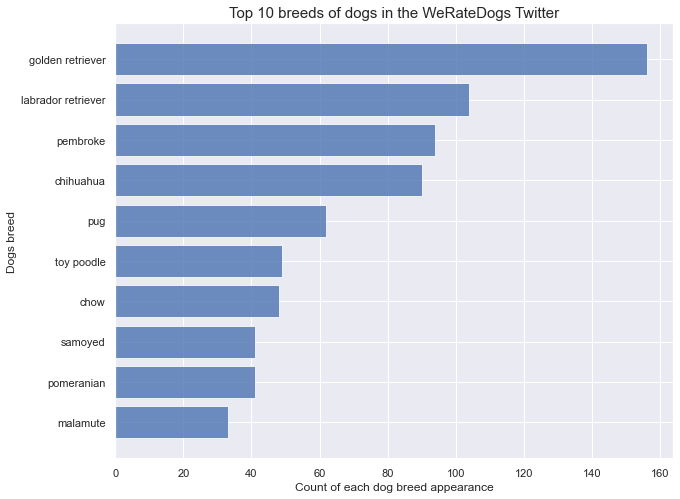

In [63]:
plt.figure(figsize=(10, 8))
plt.barh(dog_breed.index, dog_breed.values, alpha=0.8)
plt.title("Top 10 breeds of dogs in the WeRateDogs Twitter", fontsize=15)
plt.xlabel("Count of each dog breed appearance")
plt.ylabel("Dogs breed")
plt.savefig("Top 10 breeds of dogs in the WeRateDogs Twitter.png");

The golden retriever breed has the most appearances in the WeRateDogs twitter, with more than 150 appearances.

### 2. What is the breed of dog (from the top 10 in the previous insight) that has the highest averages in favorites and retweets?

In the second insight, we want to discover the breed of dog with the highest averages in favorites and retweets. Since we have a lot of differents breeds, we will considerer only the top 10 from the previous question.

In [64]:
breed_grouped = df.groupby("dog_breed", as_index=False)[["favorite_count", "retweet_count"]].mean()
breed_grouped = breed_grouped.query("dog_breed in @dog_breed.index")
breed_grouped

,dog_breed,favorite_count,retweet_count
27,chihuahua,7706.322222,2448.122222
28,chow,8427.750000,2341.041667
45,golden retriever,11215.044872,3200.243590
62,labrador retriever,10434.778846,3194.817308
66,malamute,9591.939394,2807.242424
80,pembroke,9989.840426,2636.361702
81,pomeranian,6962.756098,2337.292683
82,pug,5459.274194,1598.338710
88,samoyed,12194.609756,3978.853659
103,toy poodle,5822.530612,1908.061224


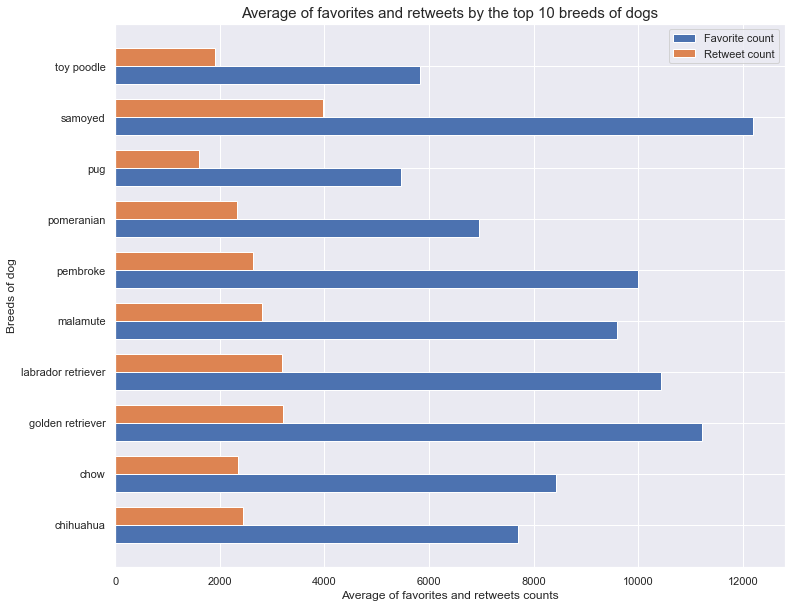

In [65]:
locations = np.arange(len(breed_grouped.dog_breed))
height = 0.35
plt.figure(figsize=(12, 10))
plt.barh(locations - height/2, breed_grouped.favorite_count, height=height, label="Favorite count")
plt.barh(locations + height/2, breed_grouped.retweet_count, height=height, label="Retweet count")
plt.yticks(locations, breed_grouped.dog_breed)
plt.title("Average of favorites and retweets by the top 10 breeds of dogs", fontsize=15)
plt.ylabel("Breeds of dog")
plt.xlabel("Average of favorites and retweets counts")
plt.legend()
plt.savefig("Average of favorites and retweets by the top 10 breeds of dogs.png");

Looking at the top 10 breeds of dogs in apparitions, the samoyed is the breed of dog with the highest averages in favorites and retweets.

### 3. What is the dog stage that most appears in the WeRateDogs twitter?

In the third insight, we will discover the dog stage that has most appeared in the WeRateDogs Twitter.

In [66]:
dog_stage = df.dog_stage.value_counts()
dog_stage

pupper     221
doggo       82
puppo       23
floofer      9
Name: dog_stage, dtype: int64

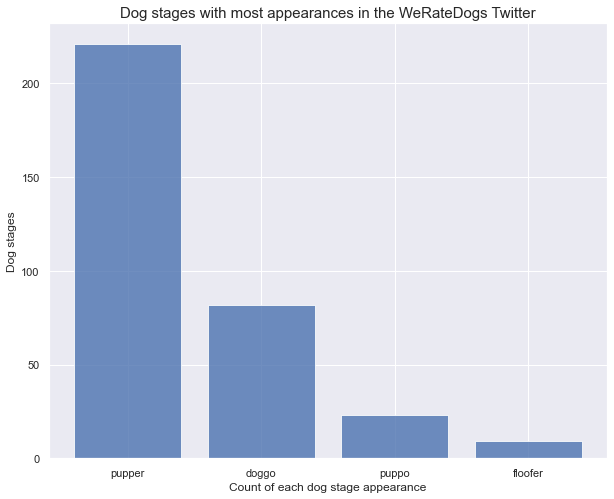

In [67]:
plt.figure(figsize=(10, 8))
plt.bar(dog_stage.index, dog_stage.values, alpha=0.8)
plt.title("Dog stages with most appearances in the WeRateDogs Twitter", fontsize=15)
plt.xlabel("Count of each dog stage appearance")
plt.ylabel("Dog stages")
plt.savefig("Dog stages with most appearances in the WeRateDogs Twitter.png");

The pupper stage has the most appearances in the WeRateDogs twitter, with more than 200 appearances.

### 4. What is the dog stage that has the highest averages in favorites and retweets?

In the fourth insight, we want to discover the dog stage with the highest averages in favorites and retweets.

In [68]:
stage_grouped = df.groupby("dog_stage", as_index=False)[["favorite_count", "retweet_count"]].mean()
stage_grouped

,dog_stage,favorite_count,retweet_count
0,doggo,16771.317073,5661.719512
1,floofer,9762.111111,3488.888889
2,pupper,6481.171946,2106.257919
3,puppo,20268.478261,5678.826087


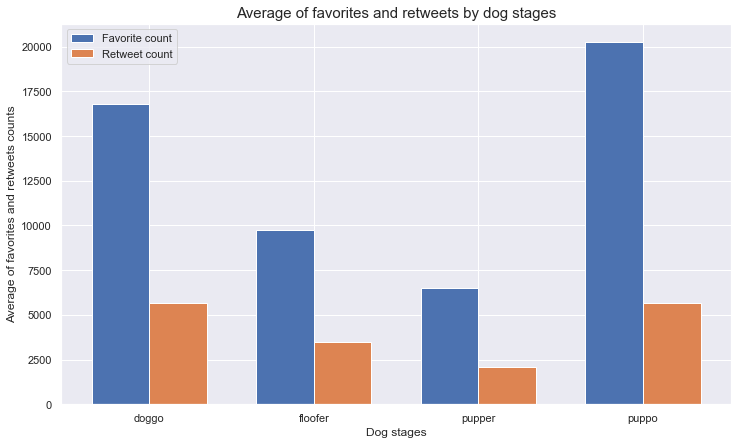

In [69]:
locations = np.arange(len(stage_grouped.dog_stage))
width = 0.35
plt.figure(figsize=(12, 7))
plt.bar(locations - width/2, stage_grouped.favorite_count, width=width, label="Favorite count")
plt.bar(locations + width/2, stage_grouped.retweet_count, width=width, label="Retweet count")
plt.xticks(locations, stage_grouped.dog_stage)
plt.title("Average of favorites and retweets by dog stages", fontsize=15)
plt.xlabel("Dog stages")
plt.ylabel("Average of favorites and retweets counts")
plt.legend()
plt.savefig("Average of favorites and retweets by dog stages.png");

Looking at the four dog stages, puppo is the one with the highest averages in favorites and retweets.